# Analyze a collection of EDI files (MT Survey)

## import modules

In [1]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import scipy
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300

from mtpy.core.edi_collection import EdiCollection


INFO:root:module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
INFO:root:Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


In [26]:
edidir='E:/Data/MT_Datasets/GA_UA_edited_10s-10000s'
edidir='E:/Data/MT_Datasets/WenPingJiang_EDI'

edifiles = glob.glob(edidir + '/*.edi')

assert len(edifiles) > 0  # must has edi files

obj = EdiCollection(edifiles)


number of stations/edifiles = 138


In [41]:
select_period=obj.get_periods_by_stats(percentage=20.0)

Selected periods 94 out of the total 174:


In [28]:
type(obj.mt_periods)

numpy.ndarray

In [29]:

stats.describe(obj.mt_periods)

DescribeResult(nobs=9180L, minmax=(7.958615200955034e-05, 4369.1017126878714), mean=182.80350792390658, variance=328983.7815319259, skewness=4.526796007080161, kurtosis=22.526748257896163)

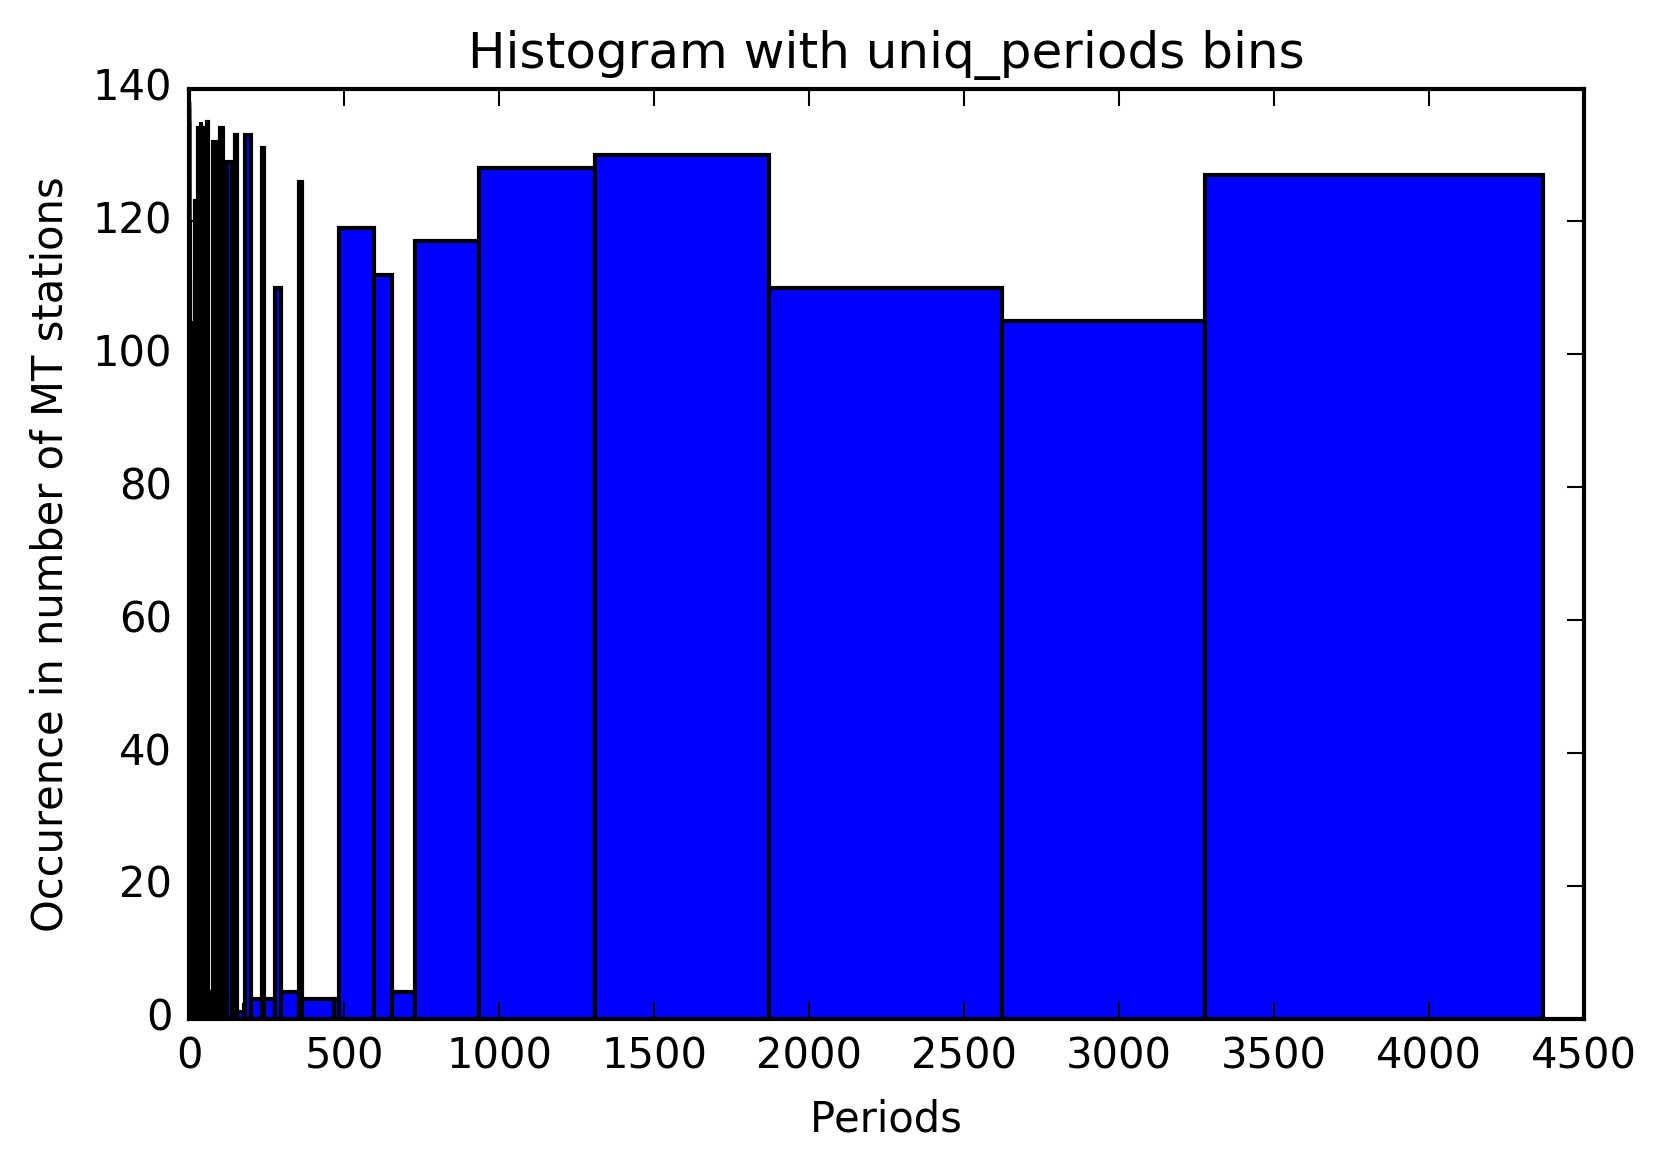

In [30]:
plt.hist(obj.mt_periods,bins=obj.all_unique_periods)
plt.title("Histogram with uniq_periods bins")
plt.xlabel("Periods")
plt.ylabel("Occurence in number of MT stations")

In [31]:

perc=np.percentile(obj.mt_periods, 90.0)

perc

485.46045924559445

In [32]:
print obj.mt_periods.sort()

None


In [33]:
 pdser=pd.Series(obj.mt_periods)

In [34]:
print(pdser.quantile(0.90))

485.460459246


In [35]:
pdser.describe()

count    9180.000000
mean      182.803508
std       573.571078
min         0.000080
25%         0.007314
50%         0.522439
75%        37.237014
max      4369.101713
dtype: float64

# modem input

In [47]:
import mtpy.modeling.modem as modem

outdir=r"E:/tmp/modem_inv1"
#1) make a list of all .edi files that will be inverted for 

md = modem.Data(edi_list=edifiles, 
                period_list=np.array(select_period),
                epsg=3112,
                error_type='floor',
                error_floor=5)


md.write_data_file(save_path=outdir)


--------------------------------------------------
('Inverting for these periods:', 94)
     0.056889    
     0.024381    
     0.017356    
     0.013474    
     0.037926    
     0.227557    
     0.009846    
     0.000162    
     0.000103    
     0.000080    
     37.237014   
     0.000127    
     58.513751   
     45.510399   
     30.340726   
     99.295005   
     182.043220  
     148.944727  
     78.021378   
     234.055058  
     1310.719060 
     121.363642  
     936.241925  
     354.245634  
     0.186182    
     0.001185    
     19.504584   
     24.824374   
     0.151704    
     1.969240    
     485.460459  
     728.173014  
     0.003160    
     0.930925    
     595.770033  
     1.462865    
     1872.448438 
     278.877718  
     0.003878    
     0.624376    
     0.005784    
     2621.437434 
     14.628652   
     0.752955    
     4.876146    
     11.377732   
     0.000970    
     0.004740    
     2.694764    
     3.471137    
     0.52243

Wrote ModEM data file to E:/tmp/modem_inv1\ModEM_Data.dat
---------------
   Number of stations = 138
   Dimensions: 
      e-w = 3591
      n-s = 2358
       z  = 31 (including air layers: 0)
   Extensions: 
      e-w = 364200.0 (m)
      n-s = 482000.0 (m)
      0-z = 162215.0 (m)
  Stations rotated by: 0.0 deg clockwise positive from N

 ** Note ModEM does not accommodate mesh rotations, it assumes
    all coordinates are aligned to geographic N, E
    therefore rotating the stations will have a similar effect
    as rotating the mesh.
---------------


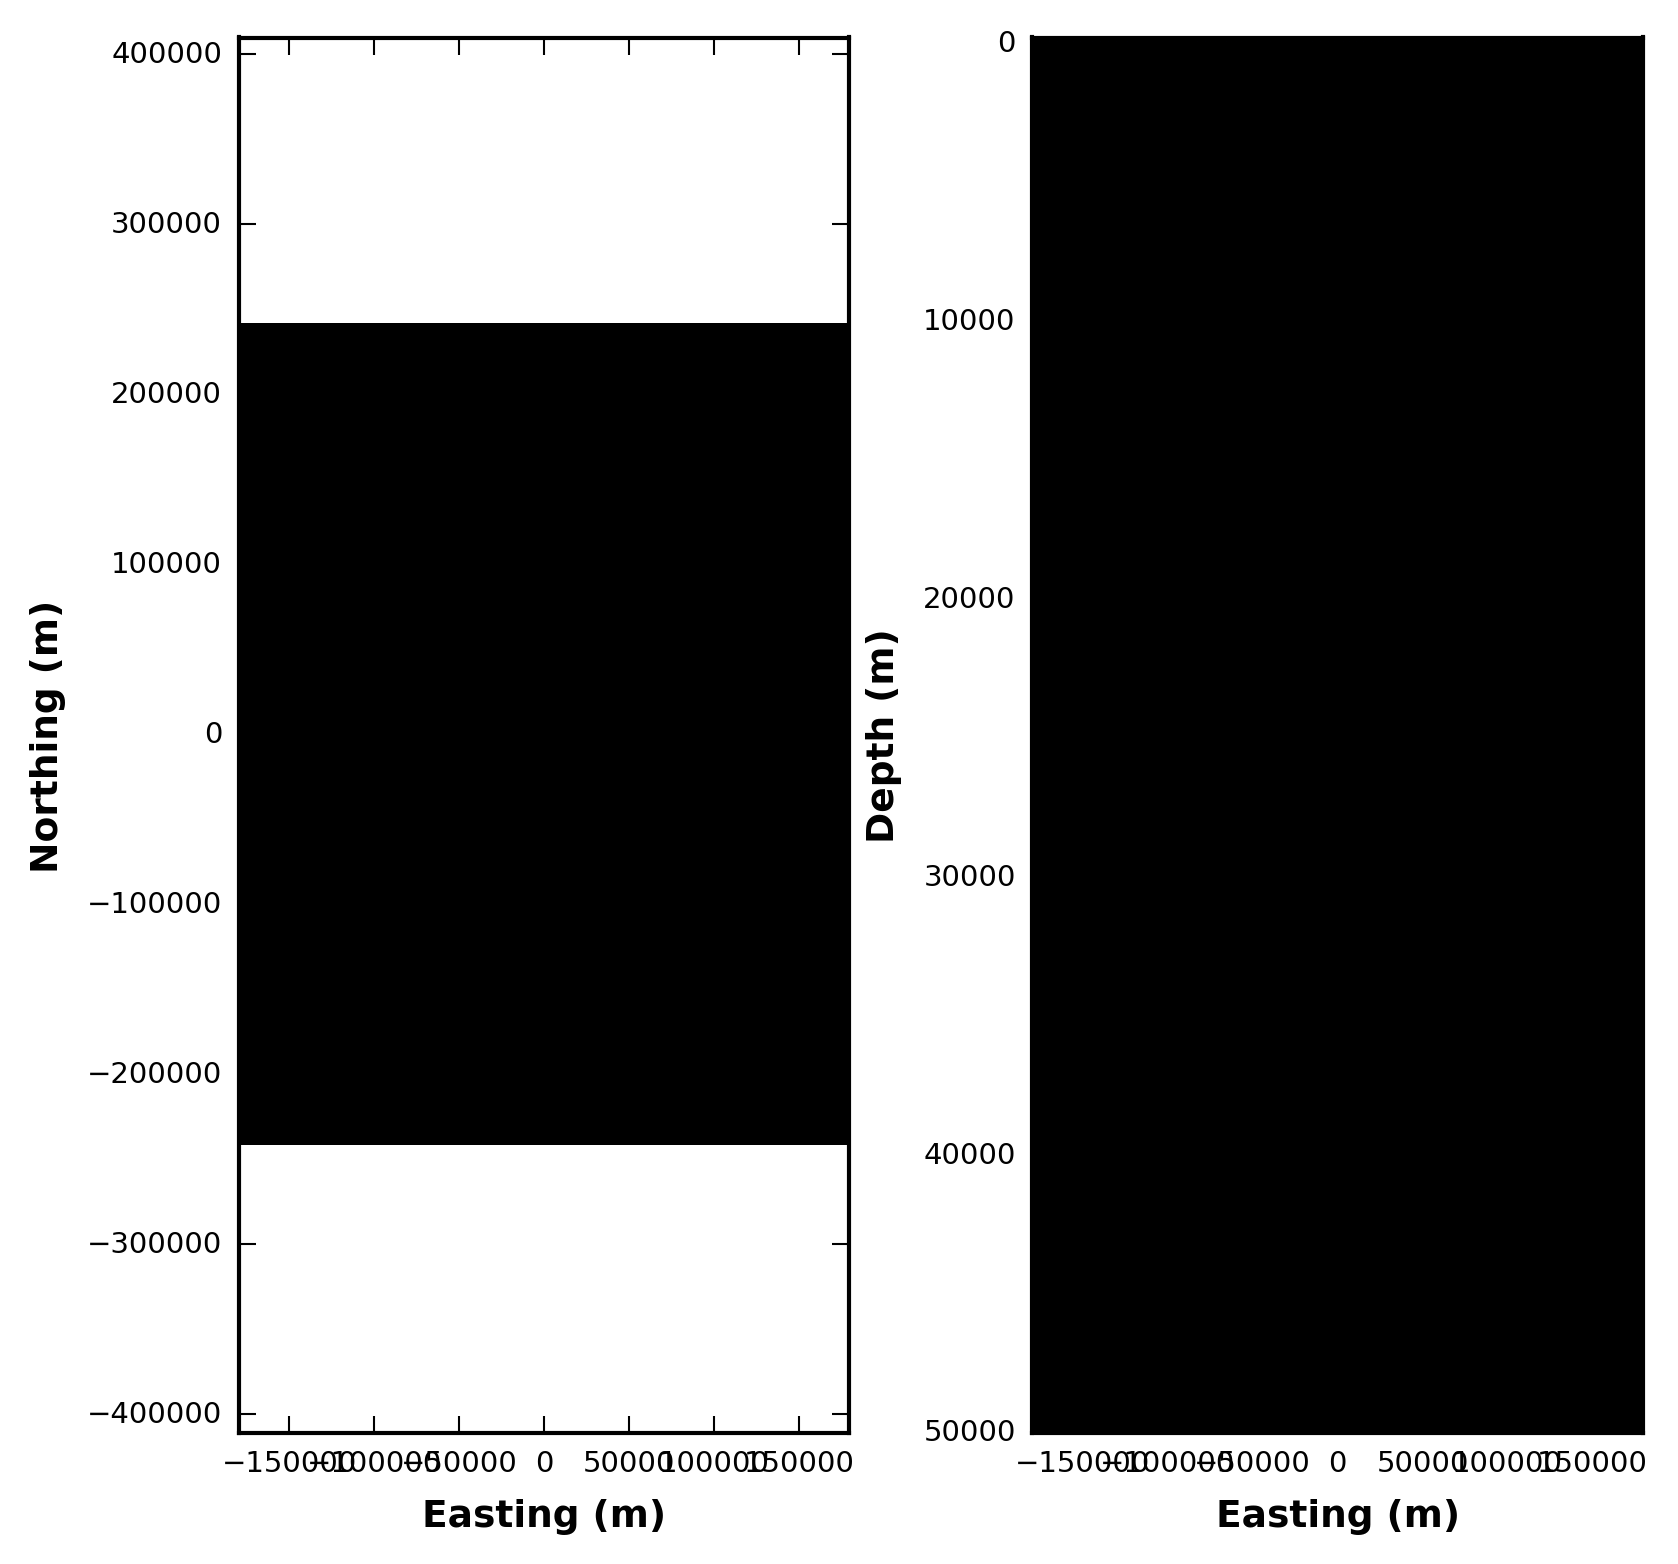

Wrote file to: E:/tmp/modem_inv1\ModEM_Model.ws


In [50]:

#3) make a grid from the stations themselves with 200m cell spacing
mmesh = modem.Model(Data=md, cell_size_east=100,  cell_size_north=200)
mmesh.make_mesh()
# check to see if the mesh is what you think it should be
mmesh.plot_mesh()
# all is good write the mesh file
mmesh.write_model_file(save_path=outdir)